In [1]:
import os
os.chdir('..')

from helpers.preprocessing import GexAtacPreprocess
from train import GexAtacTrainer
from evaluate import GexAtacEvaluation

In [2]:
gex_atac_preprocess = GexAtacPreprocess("data/multimodal/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad", 2500, 7000)

Reading dataset...
Feature selecting GEX...


Trying to set attribute `._uns` of view, copying.


Feature selecting ATAC...


Trying to set attribute `.var` of view, copying.



New GEX dim: 2500;
New ATAC dim: 7001;
AnnData dataset's shape: (69249, 9501)



In [3]:
gex_atac_preprocess.dataset.obs

,GEX_pct_counts_mt,GEX_n_counts,GEX_n_genes,GEX_size_factors,GEX_phase,ATAC_nCount_peaks,ATAC_atac_fragments,ATAC_reads_in_peaks_frac,ATAC_blacklist_fraction,ATAC_nucleosome_signal,...,VendorLot,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker
TAGTTGTCACCCTCAC-1-s1d1,1.061008,1508.0,1022,0.453484,S,4031.0,5400,0.746481,0.003473,0.642468,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CTATGGCCATAACGGG-1-s1d1,0.604230,1655.0,1081,0.455631,G2M,8636.0,19266,0.448251,0.003126,1.220679,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CCGCACACAGGTTAAA-1-s1d1,0.650069,7230.0,3304,2.435348,G2M,4674.0,6177,0.756678,0.001284,0.692573,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
TCATTTGGTAATGGAA-1-s1d1,0.812274,1108.0,793,0.347226,G2M,2803.0,4019,0.697437,0.000714,0.633838,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
ACCACATAGGTGTCCA-1-s1d1,1.674770,1851.0,1219,0.534205,G2M,1790.0,2568,0.697040,0.003352,0.727660,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAACCGCGTTTGAGGC-12-s4d9,2.777778,504.0,414,0.423378,G2M,10551.0,9280,1.136961,0.000000,0.746048,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker
TGACTTAAGTTCCCGT-12-s4d9,1.199400,667.0,506,0.540696,S,13055.0,11980,1.089733,0.001379,0.609774,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker
GCTGTACCACCGTTCC-12-s4d9,7.535642,491.0,395,0.434772,G2M,9689.0,7968,1.215989,0.001342,0.491691,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker
ACACTTGCAACTAGAA-12-s4d9,2.666667,900.0,675,0.794887,S,21123.0,23886,0.884326,0.001846,0.851667,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker


In [4]:
latent_dim = 20
gex_atac_trainer = GexAtacTrainer(
    gex_atac_preprocess, latent_dim, model="shallow"
)

Initializing dataset and dataloader...
The order of labels: ['s1d1', 's1d1', 's1d1', 's1d1', 's1d1', ..., 's4d9', 's4d9', 's4d9', 's4d9', 's4d9']
Length: 69249
Categories (13, object): ['s1d1', 's1d2', 's1d3', 's2d1', ..., 's3d10', 's4d1', 's4d8', 's4d9']

The model: GexAtacMultiModalAutoencoder(
  (gex_encoder): Sequential(
    (0): Linear(in_features=2500, out_features=250, bias=True)
    (1): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=250, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (atac_encoder): Sequential(
    (0): Linear(in_features=7001, out_features=250, bias=True)
    (1): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=250, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_runni

In [5]:
gex_atac_trainer.train(epochs=20)

Epoch 0 recon loss: 810.8584471055
Epoch 1 recon loss: 755.8661364813
Epoch 2 recon loss: 663.8500786206
Epoch 3 recon loss: 634.380045823
Epoch 4 recon loss: 572.077546183
Epoch 5 recon loss: 519.6835179431
Epoch 6 recon loss: 476.5157265598
Epoch 7 recon loss: 430.8620107968
Epoch 8 recon loss: 390.2784435168
Epoch 9 recon loss: 352.054012162
Epoch 10 recon loss: 316.7847160787
Epoch 11 recon loss: 290.8671537049
Epoch 12 recon loss: 263.9065639756
Epoch 13 recon loss: 238.7297991689
Epoch 14 recon loss: 220.5085277144
Epoch 15 recon loss: 209.1658296018
Epoch 16 recon loss: 179.989969824
Epoch 17 recon loss: 168.3686995779
Epoch 18 recon loss: 150.0535822542
Epoch 19 recon loss: 139.0223985895


In [6]:
gex_atac_eval = GexAtacEvaluation(
    gex_atac_trainer, gex_atac_preprocess
)


Latent space type: <class 'numpy.ndarray'>;
GEX encoded shape: torch.Size([69249, 10]);
ATAC encoded shape: torch.Size([69249, 10]);
Latent space shape: (69249, 20);



2022-12-14 12:09:43.606077: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.5449789849087342
   celltype_ari  celltype_ami  celltype_homogeneity  celltype_complete  \
0      0.138914      0.404272              0.467689           0.357754   

   batch_ari  batch_ami  batch_homogeneity  batch_complete  
0   0.944166   0.821767           0.783895        0.847022  


... storing 'feature_types' as categorical
... storing 'gene_id' as categorical


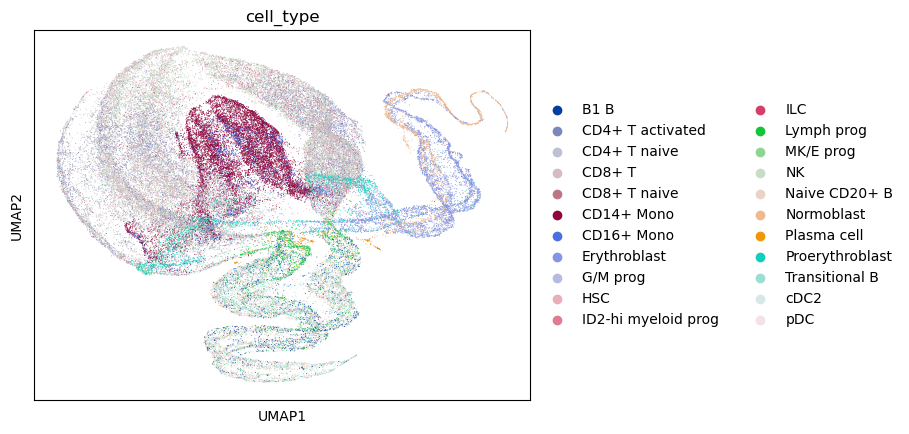

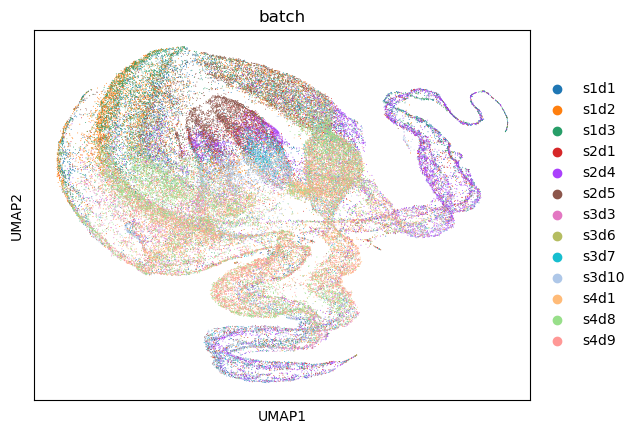

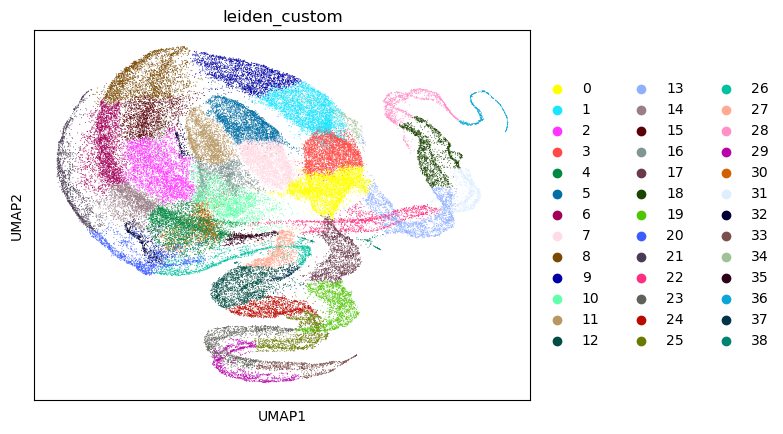

In [7]:
gex_atac_eval.evaluate()